In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from dask_ml.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from joblib import dump, load
import pickle

In [2]:
df = pd.read_csv('../global_preprocessed_without_onehot.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]


In [3]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')

The DataFrame has 171280 rows.
The DataFrame has 12 columns.


In [4]:
model = load("knn_model.joblib")

In [5]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, shuffle=True)
type(model)

sklearn.model_selection._search.GridSearchCV

Text(58.222222222222214, 0.5, 'Truth')

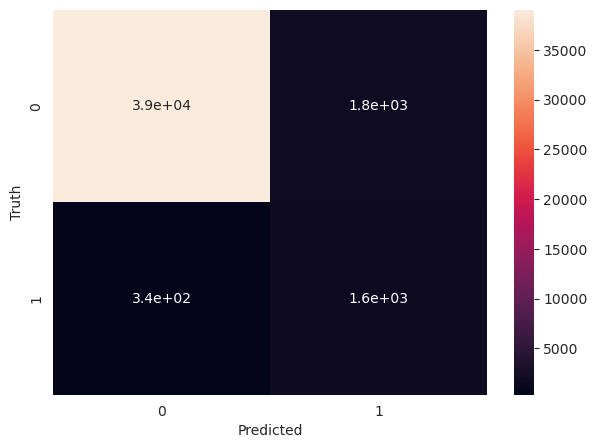

In [6]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     40832
           1       0.48      0.83      0.61      1988

    accuracy                           0.95     42820
   macro avg       0.73      0.89      0.79     42820
weighted avg       0.97      0.95      0.96     42820
